Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
print(df.dtypes)

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object


In [7]:
print(df.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [28]:
# The 'Email No.' Column is Not Needed, so we drop it
df.drop(["Email No."], axis = 1, inplace = True)

In [29]:
# Set the Independents(x) and the Target Variable(y)
x = df.drop(["Prediction"],axis =1)
y = df["Prediction"]

In [30]:
# Split the Data for Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
# KNN Classification
# We use Elbow Method/Continous Iteration to Select the Best Value of K

from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn import metrics
accuracy_values = []

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)

In [33]:
# Finding the Optimal K based on Accuracy Score

optimal_k = -1
optimal_accuracy = -1

for i in list(zip(range(1,11),accuracy_values)):
    if i[1] > optimal_accuracy :
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [34]:
print("Optimal K : " + str(optimal_k))
knn = KNeighborsClassifier(n_neighbors = optimal_k)

Optimal K : 6


In [35]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [36]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       719
           1       0.80      0.80      0.80       316

    accuracy                           0.88      1035
   macro avg       0.86      0.86      0.86      1035
weighted avg       0.88      0.88      0.88      1035



In [37]:
confusion_matrix_knn = metrics.confusion_matrix(y_test,y_pred)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = ["False","True"])

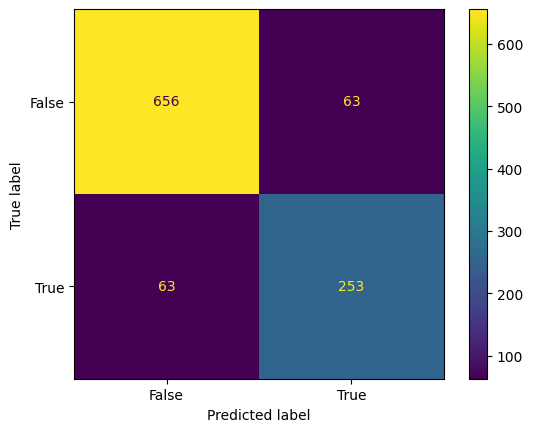

In [38]:
cm_display_knn.plot()

In [39]:
# Can Find the Metrics Manually as well :
# Recall = TP/TP+FN
# Precision = TP/TP+FP
# F1 Score = (Recall*Precision)/(Recall+Precision)
# Accuracy = TP+TN/TP+FP+FN+TN

In [40]:
# SVM
from sklearn.svm import SVC

In [41]:
svm_model = SVC()

In [42]:
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       719
           1       0.87      0.40      0.55       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035



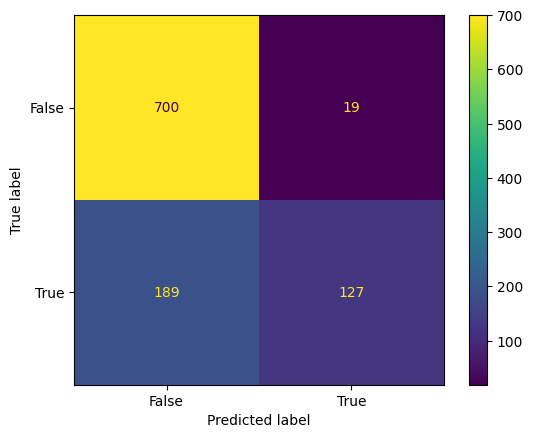

In [44]:
confusion_matrix_svm = metrics.confusion_matrix(y_test,y_pred)
display_cm_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=["False","True"])
display_cm_svm.plot()

In [45]:
# Can Find the Metrics Manually as well :
# Recall = TP/TP+FN
# Precision = TP/TP+FP
# F1 Score = (Recall*Precision)/(Recall+Precision)
# Accuracy = TP+TN/TP+FP+FN+TN

In [46]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
# Extracting TP, FP, FN, TN from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating the metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[700  19]
 [189 127]]
Accuracy: 0.7990338164251207
Error Rate: 0.20096618357487922
Precision: 0.8698630136986302
Recall: 0.40189873417721517
